In [1]:
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tqdm
from tqdm.auto import tqdm


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.model_selection import KFold


### Data - importing, cleaning and preparation

In [4]:
df = pd.read_csv('patient-characteristics-survey-pcs-2013-1.csv')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] =df[c].str.lower().str.replace(' ','_')
categorical_columns

['program_category',
 'region_served',
 'age_group',
 'sex',
 'transgender',
 'sexual_orientation',
 'hispanic_ethnicity',
 'race',
 'living_situation',
 'household_composition',
 'primary_language',
 'veteran_status',
 'employment_status',
 'number_of_hours_worked_each_week',
 'educational_status',
 'special_educational_services',
 'mental_illness',
 'intellectual_disability',
 'autism_spectrum',
 'other_developmental_disabilities',
 'alcohol_related_disorder',
 'drug_substance_related_disorder',
 'mobility_impairment_disorder',
 'hearing_visual_impairment',
 'hyperlipidemia',
 'high_blood_pressure',
 'diabetes',
 'obesity',
 'heart_attack',
 'stroke',
 'other_cardiac',
 'pulmonary/asthma',
 'alzheimer_or_dementia',
 'kidney_disease',
 'liver_disease',
 'endocrine_condition',
 'neurological_condition',
 'traumatic_brain_injury',
 'joint_disease',
 'cancer',
 'no_chronic_med._condition',
 'unknown_chronic_med._condition',
 'smokes',
 'receives_smoking_medication',
 'receives_smoking_co

In [6]:
cols = ['program_category','age_group','sex','sexual_orientation','transgender','living_situation','veteran_status','employment_status',
       'number_of_hours_worked_each_week','educational_status',
       'special_educational_services', 'mental_illness',
       'intellectual_disability', 'autism_spectrum',
       'other_developmental_disabilities', 'alcohol_related_disorder',
       'drug_substance_related_disorder', 'mobility_impairment_disorder',
       'hearing_visual_impairment','hyperlipidemia', 'high_blood_pressure',
       'diabetes', 'obesity', 'heart_attack', 'stroke', 'other_cardiac',
       'pulmonary/asthma', 'alzheimer_or_dementia', 'kidney_disease',
       'liver_disease', 'endocrine_condition', 'neurological_condition',
       'traumatic_brain_injury', 'joint_disease', 'cancer',
       'no_chronic_med._condition', 'unknown_chronic_med._condition', 'smokes',
       'receives_smoking_medication', 'receives_smoking_counseling',
       'serious_mental_illness', 'principal_diagnosis_class',
       'additional_diagnosis_class','no_insurance','criminal_justice_status']


In [7]:
df = df[cols]

## EDA

In [8]:
for i in cols:
    df = df[df[i] != "unknown"]
    

In [9]:
#unemployment/education
#criminal justice
#insurance cover correlation with the above
#physical/mental illness 
#find out the biggest cause for disability amongst illnesses
#find if it is insured enough
#find which is most insured and looked at
#establish the importance of taking the more disabling illness seriously

In [10]:
#insurance cover --> yes or no 

In [11]:
df.number_of_hours_worked_each_week.values

array(['35_hours_or_more', 'not_applicable', 'not_applicable', ...,
       'not_applicable', 'not_applicable', 'not_applicable'], dtype=object)

In [12]:
impairments = ['intellectual_disability','other_developmental_disabilities','mobility_impairment_disorder',
       'hearing_visual_impairment']
for i in impairments:
    print(df[i].value_counts())

no     123332
yes      8205
Name: intellectual_disability, dtype: int64
no     127756
yes      3781
Name: other_developmental_disabilities, dtype: int64
no     125813
yes      5724
Name: mobility_impairment_disorder, dtype: int64
no     125869
yes      5668
Name: hearing_visual_impairment, dtype: int64


In [13]:
df.no_insurance.value_counts()

no     124547
yes      6990
Name: no_insurance, dtype: int64

In [14]:
df.dtypes

program_category                    object
age_group                           object
sex                                 object
sexual_orientation                  object
transgender                         object
living_situation                    object
veteran_status                      object
employment_status                   object
number_of_hours_worked_each_week    object
educational_status                  object
special_educational_services        object
mental_illness                      object
intellectual_disability             object
autism_spectrum                     object
other_developmental_disabilities    object
alcohol_related_disorder            object
drug_substance_related_disorder     object
mobility_impairment_disorder        object
hearing_visual_impairment           object
hyperlipidemia                      object
high_blood_pressure                 object
diabetes                            object
obesity                             object
heart_attac

In [15]:
df.isnull().sum()

program_category                    0
age_group                           0
sex                                 0
sexual_orientation                  0
transgender                         0
living_situation                    0
veteran_status                      0
employment_status                   0
number_of_hours_worked_each_week    0
educational_status                  0
special_educational_services        0
mental_illness                      0
intellectual_disability             0
autism_spectrum                     0
other_developmental_disabilities    0
alcohol_related_disorder            0
drug_substance_related_disorder     0
mobility_impairment_disorder        0
hearing_visual_impairment           0
hyperlipidemia                      0
high_blood_pressure                 0
diabetes                            0
obesity                             0
heart_attack                        0
stroke                              0
other_cardiac                       0
pulmonary/as

In [16]:
categorical= ['program_category','sexual_orientation','living_situation','employment_status','number_of_hours_worked_each_week','educational_status','special_educational_services','principal_diagnosis_class','additional_diagnosis_class','intellectual_disability','other_developmental_disabilities','mobility_impairment_disorder',
       'hearing_visual_impairment','age_group','sex','transgender','veteran_status','mental_illness','intellectual_disability','autism_spectrum','other_developmental_disabilities','alcohol_related_disorder','drug_substance_related_disorder','mobility_impairment_disorder','hearing_visual_impairment','hyperlipidemia','high_blood_pressure','diabetes','obesity','heart_attack','stroke','other_cardiac','pulmonary/asthma','alzheimer_or_dementia','kidney_disease','liver_disease','endocrine_condition','neurological_condition','traumatic_brain_injury','joint_disease','cancer','no_chronic_med._condition','unknown_chronic_med._condition','smokes','receives_smoking_medication','receives_smoking_counseling','serious_mental_illness','criminal_justice_status']

#df_new = df.copy()
#for i in categorical:
#new_df.drop(i,inplace=True,axis=1)
categorical

['program_category',
 'sexual_orientation',
 'living_situation',
 'employment_status',
 'number_of_hours_worked_each_week',
 'educational_status',
 'special_educational_services',
 'principal_diagnosis_class',
 'additional_diagnosis_class',
 'intellectual_disability',
 'other_developmental_disabilities',
 'mobility_impairment_disorder',
 'hearing_visual_impairment',
 'age_group',
 'sex',
 'transgender',
 'veteran_status',
 'mental_illness',
 'intellectual_disability',
 'autism_spectrum',
 'other_developmental_disabilities',
 'alcohol_related_disorder',
 'drug_substance_related_disorder',
 'mobility_impairment_disorder',
 'hearing_visual_impairment',
 'hyperlipidemia',
 'high_blood_pressure',
 'diabetes',
 'obesity',
 'heart_attack',
 'stroke',
 'other_cardiac',
 'pulmonary/asthma',
 'alzheimer_or_dementia',
 'kidney_disease',
 'liver_disease',
 'endocrine_condition',
 'neurological_condition',
 'traumatic_brain_injury',
 'joint_disease',
 'cancer',
 'no_chronic_med._condition',
 'unkno

In [17]:
df.no_insurance = (df.no_insurance=="no").astype(int)
df.no_insurance
#converts true --> 1 and false --> 0

1         1
3         1
4         1
5         1
6         1
         ..
180197    1
180199    1
180200    1
180202    1
180203    1
Name: no_insurance, Length: 131537, dtype: int32

In [18]:
df.no_insurance.value_counts()

1    124547
0      6990
Name: no_insurance, dtype: int64

In [19]:
for i in cols:
    print(df[i].value_counts())


outpatient     86336
residential    19799
support        16862
inpatient       6778
emergency       1762
Name: program_category, dtype: int64
adult    108913
child     22624
Name: age_group, dtype: int64
female    68361
male      63176
Name: sex, dtype: int64
straight_or_heterosexual       123909
lesbian,_gay,_or_homosexual      3722
bisexual                         3307
other                             599
Name: sexual_orientation, dtype: int64
no,_not_transgender    131217
yes,_transgender          320
Name: transgender, dtype: int64
private_residence         106003
other_living_situation     23287
institutional_setting       2247
Name: living_situation, dtype: int64
no     127347
yes      4190
Name: veteran_status, dtype: int64
not_in_labor_force:unemployed_and_not_looking_for_work    95058
employed                                                  19212
unemployed,_looking_for_work                              14507
non-paid/volunteer                                         1840
un

### TRAIN_TEST_SPLIT

In [20]:
df_full_train,df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=1,
)
df_train,df_val = train_test_split(
    df_full_train,
    test_size=0.25,
    random_state=1,
)

In [21]:
len(df_full_train),len(df_train),len(df_test),len(df_val)

(105229, 78921, 26308, 26308)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.no_insurance.values

y_val = df_val.no_insurance.values

y_test = df_test.no_insurance.values

In [24]:
df_train

,program_category,age_group,sex,sexual_orientation,transgender,living_situation,veteran_status,employment_status,number_of_hours_worked_each_week,educational_status,...,no_chronic_med._condition,unknown_chronic_med._condition,smokes,receives_smoking_medication,receives_smoking_counseling,serious_mental_illness,principal_diagnosis_class,additional_diagnosis_class,no_insurance,criminal_justice_status
0,outpatient,child,male,straight_or_heterosexual,"no,_not_transgender",private_residence,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,pre-k_to_fifth_grade,...,yes,no,no,no,no,yes,mental_illness,mental_illness,1,no
1,outpatient,child,male,straight_or_heterosexual,"no,_not_transgender",private_residence,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,middle_school_to_high_school,...,yes,no,yes,no,no,yes,mental_illness,mental_illness,1,no
2,outpatient,child,female,straight_or_heterosexual,"no,_not_transgender",private_residence,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,pre-k_to_fifth_grade,...,yes,no,no,no,no,yes,mental_illness,unknown/deferred,1,no
3,residential,adult,male,straight_or_heterosexual,"no,_not_transgender",other_living_situation,no,"unemployed,_looking_for_work",not_applicable,middle_school_to_high_school,...,no,no,yes,no,yes,yes,unknown/deferred,unknown/deferred,1,no
4,outpatient,adult,male,straight_or_heterosexual,"no,_not_transgender",other_living_situation,no,non-paid/volunteer,not_applicable,middle_school_to_high_school,...,no,no,yes,no,yes,yes,mental_illness,mental_retardation/dev._disorder,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78916,outpatient,child,female,straight_or_heterosexual,"no,_not_transgender",private_residence,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,no_formal_education,...,yes,no,no,no,no,yes,mental_illness,unknown/deferred,1,no
78917,outpatient,adult,male,straight_or_heterosexual,"no,_not_transgender",other_living_situation,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,middle_school_to_high_school,...,no,no,yes,yes,yes,yes,mental_illness,substance-related_disorder,1,no
78918,outpatient,adult,female,straight_or_heterosexual,"no,_not_transgender",private_residence,no,"unemployed,_looking_for_work",not_applicable,middle_school_to_high_school,...,no,no,no,no,no,yes,mental_illness,unknown/deferred,1,no
78919,outpatient,adult,male,straight_or_heterosexual,"no,_not_transgender",private_residence,no,not_in_labor_force:unemployed_and_not_looking_...,not_applicable,middle_school_to_high_school,...,no,no,no,no,no,yes,mental_illness,mental_illness,1,no


In [25]:
del df_train['no_insurance']
del df_val['no_insurance']
del df_test['no_insurance']

In [26]:
df_full_train.reset_index(drop =True)
df_full_train.isnull().sum()

program_category                    0
age_group                           0
sex                                 0
sexual_orientation                  0
transgender                         0
living_situation                    0
veteran_status                      0
employment_status                   0
number_of_hours_worked_each_week    0
educational_status                  0
special_educational_services        0
mental_illness                      0
intellectual_disability             0
autism_spectrum                     0
other_developmental_disabilities    0
alcohol_related_disorder            0
drug_substance_related_disorder     0
mobility_impairment_disorder        0
hearing_visual_impairment           0
hyperlipidemia                      0
high_blood_pressure                 0
diabetes                            0
obesity                             0
heart_attack                        0
stroke                              0
other_cardiac                       0
pulmonary/as

### One hot encoding 

In [27]:
df["number_of_hours_worked_each_week"].value_counts()

not_applicable              112325
15-34_hours                   7225
35_hours_or_more              6724
01-14_hours                   4271
unknown_employment_hours       992
Name: number_of_hours_worked_each_week, dtype: int64

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
train_dicts = df_train[categorical].to_dict(orient='records')
val_dicts = df_val[categorical].to_dict(orient='records')

C:\Users\SIVAPRIYA\AppData\Local\Temp\ipykernel_19688\29190943.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts = df_train[categorical].to_dict(orient='records')
C:\Users\SIVAPRIYA\AppData\Local\Temp\ipykernel_19688\29190943.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts = df_val[categorical].to_dict(orient='records')


In [30]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [31]:
X_train.shape

(78921, 112)

In [32]:
dv.get_feature_names_out()

array(['additional_diagnosis_class=mental_illness',
       'additional_diagnosis_class=mental_retardation/dev._disorder',
       'additional_diagnosis_class=organic_mental_disorder',
       'additional_diagnosis_class=physical_disorder',
       'additional_diagnosis_class=substance-related_disorder',
       'additional_diagnosis_class=unknown/deferred', 'age_group=adult',
       'age_group=child', 'alcohol_related_disorder=no',
       'alcohol_related_disorder=yes', 'alzheimer_or_dementia=no',
       'alzheimer_or_dementia=yes', 'autism_spectrum=no',
       'autism_spectrum=yes', 'cancer=no', 'cancer=yes',
       'criminal_justice_status=no', 'criminal_justice_status=yes',
       'diabetes=no', 'diabetes=yes',
       'drug_substance_related_disorder=no',
       'drug_substance_related_disorder=yes',
       'educational_status=college_or_graduate_degree',
       'educational_status=middle_school_to_high_school',
       'educational_status=no_formal_education',
       'educational_status

In [33]:
train_dicts[0]

{'program_category': 'outpatient',
 'sexual_orientation': 'straight_or_heterosexual',
 'living_situation': 'private_residence',
 'employment_status': 'not_in_labor_force:unemployed_and_not_looking_for_work',
 'number_of_hours_worked_each_week': 'not_applicable',
 'educational_status': 'pre-k_to_fifth_grade',
 'special_educational_services': 'yes',
 'principal_diagnosis_class': 'mental_illness',
 'additional_diagnosis_class': 'mental_illness',
 'intellectual_disability': 'no',
 'other_developmental_disabilities': 'no',
 'mobility_impairment_disorder': 'no',
 'hearing_visual_impairment': 'no',
 'age_group': 'child',
 'sex': 'male',
 'transgender': 'no,_not_transgender',
 'veteran_status': 'no',
 'mental_illness': 'yes',
 'autism_spectrum': 'no',
 'alcohol_related_disorder': 'no',
 'drug_substance_related_disorder': 'no',
 'hyperlipidemia': 'no',
 'high_blood_pressure': 'no',
 'diabetes': 'no',
 'obesity': 'no',
 'heart_attack': 'no',
 'stroke': 'no',
 'other_cardiac': 'no',
 'pulmonary/a

## Model 1  -- > Logistic Regression

In [34]:
#LOGISTIC REGRESSION
model1_v1= LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model1_v1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
y_pred1_v1_val = model1_v1.predict_proba(X_val)[:,1]

In [36]:
y_pred1_v1_val,y_val

(array([0.99357626, 0.99251584, 0.91721476, ..., 0.87803554, 0.35253451,
        0.98181538]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [37]:
decision = (y_pred1_v1_val >= 0.5).astype("int")
print(decision)
accuracy_model1_v1_val = (decision == y_val).mean()
auc_model1_v1 = roc_auc_score(y_val,y_pred1_v1_val)
print(f"accuracy logistic regression Version 1 : {accuracy_model1_v1_val}")
print(f"auc logistic regression Version 1 : {auc_model1_v1}")

[1 1 1 ... 1 0 1]
accuracy logistic regression Version 1 : 0.9505093507678273
auc logistic regression Version 1 : 0.7842579518874921


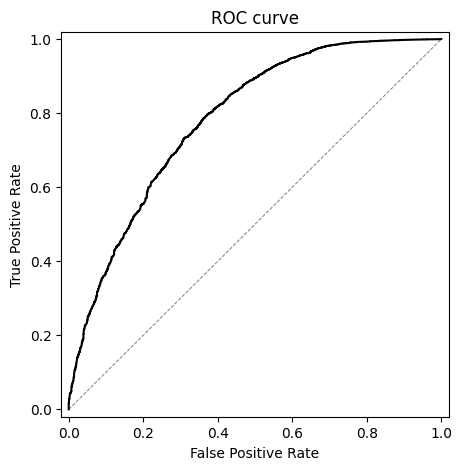

In [38]:
fpr_LR_v1, tpr_LR_v1, _ = roc_curve(y_val, y_pred1_v1_val)

plt.figure(figsize=(5, 5))

plt.plot(fpr_LR_v1, tpr_LR_v1, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

### Tuning Logistic regression

In [ ]:
#C_scores = []
#C_vals = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

#for i in range (0,len(C_vals)):
#    model1_v2= LogisticRegression(solver="liblinear", C=C_vals[i], max_iter=1000, random_state=42)
#    model1_v2.fit(X_train,y_train)
#    y_pred1_v2_val = model1_v2.predict_proba(X_val)[:,1]
#    C_scores.append(y_pred1_v2_val)
#    print(f"{C_vals[i]} : {C_scores[i]}")

## K-Fold cross validation

In [39]:
def train(df_train, y_train, C=1.0):
    dicts_kfold = df_train[categorical].to_dict(orient='records')

    dv_kfold = DictVectorizer(sparse=False)
    X_train_kfold = dv_kfold.fit_transform(dicts_kfold)

    model_kfold = LogisticRegression(C=C, max_iter=1000)
    model_kfold.fit(X_train, y_train)
    
    return dv_kfold, model_kfold

In [40]:
dv_kfold, model_kfold = train(df_train, y_train, C=0.001)
def predict(df, dv_kfold, model_kfold):
    dicts_kfold = df[categorical].to_dict(orient='records')

    X_kfold = dv_kfold.transform(dicts_kfold)
    y_pred_kfold = model_kfold.predict_proba(X_kfold)[:, 1]
    
    return y_pred_kfold
y_pred_kfold = predict(df_val, dv_kfold, model_kfold)


C:\Users\SIVAPRIYA\AppData\Local\Temp\ipykernel_19688\1361697380.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_kfold = df_train[categorical].to_dict(orient='records')
C:\Users\SIVAPRIYA\AppData\Local\Temp\ipykernel_19688\3467246124.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_kfold = df[categorical].to_dict(orient='records')


In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores_kfold = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_kfold = df_full_train.iloc[train_idx]
        df_val_kfold = df_full_train.iloc[val_idx]

        y_train_kfold = df_train_kfold.no_insurance.values
        y_val_kfold = df_val_kfold.no_insurance.values

        dv_kfold, model_kfold = train(df_train_kfold, y_train_kfold, C=C)
        y_pred_kfold = predict(df_val_kfold, dv_kfold, model_kfold)

        auc_kfold = roc_auc_score(y_val, y_pred_kfold)
        scores_kfold.append(auc_kfold)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores_kfold), np.std(scores_kfold)))

In [42]:
len(df_val_kfold), len(y_val_kfold)

(21046, 21046)

## Decision Tree

In [43]:
model_dt_V1 = DecisionTreeClassifier()
model_dt_V1.fit(X_train, y_train)
y_pred_dt_train_v1 = model_dt_V1.predict_proba(X_train)[:, 1]
roc_auc_score(y_train,y_pred_dt_train_v1)

0.9845612766352381

In [44]:
y_pred_dt_v1 = model_dt_V1.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt_v1)

0.656983441312273

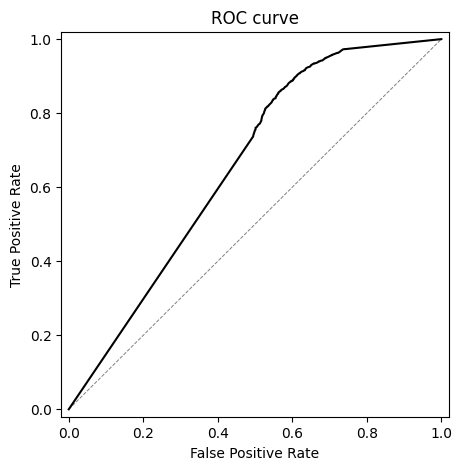

In [45]:
fpr_dt_v1, tpr_dt_v1, _ = roc_curve(y_val, y_pred_dt_v1)

plt.figure(figsize=(5, 5))

plt.plot(fpr_dt_v1, tpr_dt_v1, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

### tuning decision tree

In [46]:

auc_scores_train_dt = []
auc_scores_val_dt = []
max_depth_vals = [2,4,6,8,10,12,14,16,18,20]
for i in range(0,len(max_depth_vals)):
    model_dt_V1 = DecisionTreeClassifier(max_depth=max_depth_vals[i])
    model_dt_V1.fit(X_train, y_train)

    y_pred = model_dt_V1.predict_proba(X_train)[:, 1]
    auc = roc_auc_score(y_train, y_pred)
    auc_scores_train_dt.append(auc)
    print(f"max_depth :{i} --->  auc_train :{auc}")


    y_pred = model_dt_V1.predict_proba(X_val)[:, 1]
    auc1 = roc_auc_score(y_val, y_pred)
    auc_scores_val_dt.append(auc1)
    print(f"max_depth :{i} --->  auc_validation :{auc1}")
    print("\n")

# max_depth = 3 gives best validation accuracy , 77.8%

max_depth :0 --->  auc_train :0.6374708041337461
max_depth :0 --->  auc_validation :0.6387429309910139


max_depth :1 --->  auc_train :0.7400941902961
max_depth :1 --->  auc_validation :0.7248857238223533


max_depth :2 --->  auc_train :0.7826877291728394
max_depth :2 --->  auc_validation :0.7588372676405476


max_depth :3 --->  auc_train :0.8143168787620065
max_depth :3 --->  auc_validation :0.7787571707999551


max_depth :4 --->  auc_train :0.8341871785361067
max_depth :4 --->  auc_validation :0.7746475904639919


max_depth :5 --->  auc_train :0.85444022107116
max_depth :5 --->  auc_validation :0.7529842581704217


max_depth :6 --->  auc_train :0.8783484342493816
max_depth :6 --->  auc_validation :0.7322427236134805


max_depth :7 --->  auc_train :0.9018137747527397
max_depth :7 --->  auc_validation :0.709493505966216


max_depth :8 --->  auc_train :0.9217700315838724
max_depth :8 --->  auc_validation :0.685318912831045


max_depth :9 --->  auc_train :0.9391467953197312
max_depth :9 

In [47]:
#tuning min_leaf parameter with max_depth = 3
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.725
5 -> 0.725
10 -> 0.725
15 -> 0.725
20 -> 0.725
50 -> 0.724
100 -> 0.724
200 -> 0.723


In [48]:
for m in [4, 5, 6,7,8,9,10,15,20]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.725
5 -> 0.725
10 -> 0.725
15 -> 0.725
20 -> 0.725
50 -> 0.724
100 -> 0.724
200 -> 0.723

depth: 5
1 -> 0.738
5 -> 0.737
10 -> 0.738
15 -> 0.738
20 -> 0.739
50 -> 0.739
100 -> 0.740
200 -> 0.740

depth: 6
1 -> 0.759
5 -> 0.758
10 -> 0.759
15 -> 0.759
20 -> 0.760
50 -> 0.760
100 -> 0.759
200 -> 0.763

depth: 7
1 -> 0.774
5 -> 0.775
10 -> 0.774
15 -> 0.776
20 -> 0.776
50 -> 0.778
100 -> 0.780
200 -> 0.778

depth: 8
1 -> 0.779
5 -> 0.778
10 -> 0.780
15 -> 0.782
20 -> 0.784
50 -> 0.785
100 -> 0.786
200 -> 0.787

depth: 9
1 -> 0.781
5 -> 0.778
10 -> 0.781
15 -> 0.786
20 -> 0.789
50 -> 0.790
100 -> 0.790
200 -> 0.788

depth: 10
1 -> 0.775
5 -> 0.775
10 -> 0.783
15 -> 0.786
20 -> 0.789
50 -> 0.793
100 -> 0.792
200 -> 0.788

depth: 15
1 -> 0.721
5 -> 0.735
10 -> 0.757
15 -> 0.766
20 -> 0.775
50 -> 0.783
100 -> 0.785
200 -> 0.792

depth: 20
1 -> 0.677
5 -> 0.715
10 -> 0.749
15 -> 0.761
20 -> 0.773
50 -> 0.782
100 -> 0.787
200 -> 0.793



In [49]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.780
5 -> 0.778
10 -> 0.781
15 -> 0.786
20 -> 0.789
50 -> 0.790
100 -> 0.790
200 -> 0.788


In [50]:
Model2_dt_final = DecisionTreeClassifier(max_depth=9, min_samples_leaf=50)
Model2_dt_final.fit(X_train, y_train)

y_pred_dt_final = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt_final)

0.7876325669220987

### plotting Decision tree final model

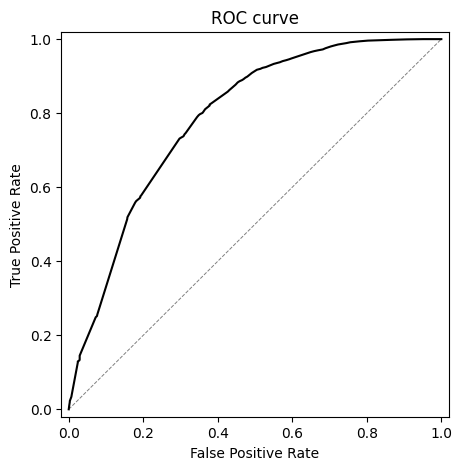

In [51]:
fpr_dt_final, tpr_dt_final, _ = roc_curve(y_val, y_pred_dt_final)

plt.figure(figsize=(5, 5))

plt.plot(fpr_dt_final, tpr_dt_final, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Model 3 --> Random forest

In [52]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.722 +- 0.004
0.718 -- 0.726


In [53]:
rf = RandomForestClassifier(n_estimators=10,random_state = 2)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7243254421753684

In [54]:
# checking auc for varying number of trees

In [55]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)
    

10 -> 0.726
20 -> 0.738
30 -> 0.742
40 -> 0.744
50 -> 0.746
60 -> 0.745
70 -> 0.745
80 -> 0.745
90 -> 0.746
100 -> 0.747
110 -> 0.747
120 -> 0.747
130 -> 0.746
140 -> 0.747
150 -> 0.748
160 -> 0.748
170 -> 0.748
180 -> 0.749
190 -> 0.748
200 -> 0.748


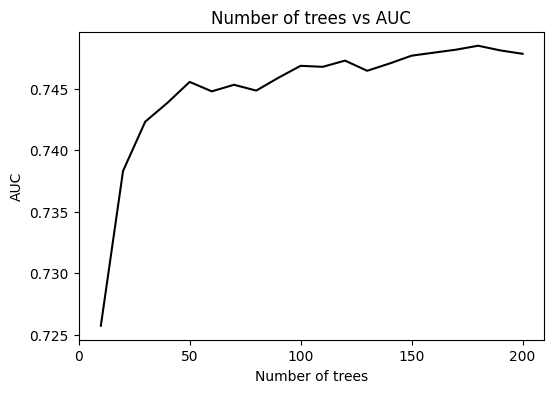

In [56]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [57]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()
    

depth: 5
10 -> 0.772
20 -> 0.782
30 -> 0.782
40 -> 0.780
50 -> 0.781
60 -> 0.783
70 -> 0.784
80 -> 0.783
90 -> 0.784
100 -> 0.784
110 -> 0.783
120 -> 0.784
130 -> 0.783
140 -> 0.783
150 -> 0.783
160 -> 0.783
170 -> 0.782
180 -> 0.782
190 -> 0.782
200 -> 0.782

depth: 10
10 -> 0.789
20 -> 0.795
30 -> 0.796
40 -> 0.798
50 -> 0.799
60 -> 0.800
70 -> 0.800
80 -> 0.800
90 -> 0.801
100 -> 0.800
110 -> 0.801
120 -> 0.801
130 -> 0.801
140 -> 0.801
150 -> 0.801
160 -> 0.801
170 -> 0.801
180 -> 0.801
190 -> 0.801
200 -> 0.801

depth: 20
10 -> 0.777
20 -> 0.785
30 -> 0.790
40 -> 0.792
50 -> 0.791
60 -> 0.792
70 -> 0.792
80 -> 0.794
90 -> 0.794
100 -> 0.795
110 -> 0.795
120 -> 0.796
130 -> 0.795
140 -> 0.796
150 -> 0.796
160 -> 0.796
170 -> 0.796
180 -> 0.796
190 -> 0.796
200 -> 0.796



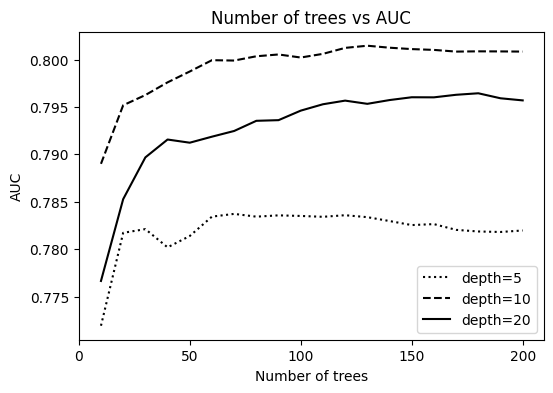

In [58]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [59]:
# Tuning min_sample_leaf
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.797
30 -> 0.797
50 -> 0.799
70 -> 0.799
90 -> 0.799
110 -> 0.800
130 -> 0.800
150 -> 0.800
170 -> 0.800
190 -> 0.800

min_samples_leaf: 5
10 -> 0.795
30 -> 0.797
50 -> 0.798
70 -> 0.799
90 -> 0.800
110 -> 0.800
130 -> 0.800
150 -> 0.801
170 -> 0.801
190 -> 0.801

min_samples_leaf: 10
10 -> 0.797
30 -> 0.798
50 -> 0.798
70 -> 0.799
90 -> 0.800
110 -> 0.800
130 -> 0.800
150 -> 0.800
170 -> 0.800
190 -> 0.800



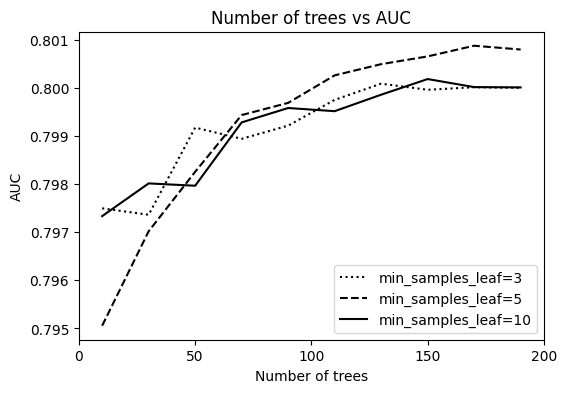

In [60]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

In [61]:
#Final Random forest model

Model3_RF_Final = RandomForestClassifier(n_estimators=170,max_depth=10 ,min_samples_leaf=5)
Model3_RF_Final.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=170)

In [62]:
y_pred_RF_final = Model3_RF_Final.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred_RF_final)

0.8014434879543902

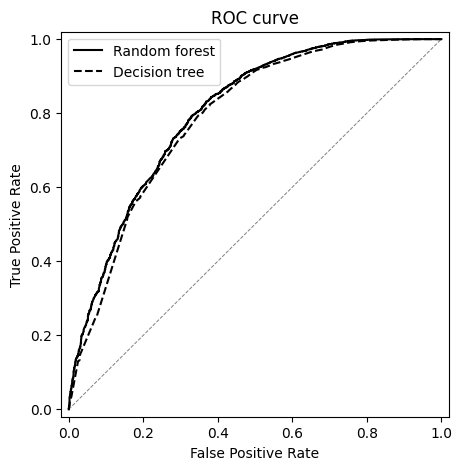

In [63]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_RF_final)
plt.plot(fpr, tpr, color='black')


fpr, tpr, _ = roc_curve(y_val,y_pred_dt_final)
plt.plot(fpr, tpr, color='black', linestyle='dashed',label='Decision tree')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(['Random forest','Decision tree'])
plt.show()


## Model 4 --> XG Boost

In [64]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [65]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [66]:
model4_V1 = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [67]:
y_pred_xgb = model4_V1.predict(dval)
y_pred_xgb[:10]

array([0.9636904 , 0.9668363 , 0.95206773, 0.963345  , 0.961047  ,
       0.8957483 , 0.9616484 , 0.97152644, 0.94974476, 0.9083605 ],
      dtype=float32)

In [68]:
roc_auc_score(y_val, y_pred_xgb)

0.8033854669870609

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [70]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [71]:
model4_V2 = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.80949	val-auc:0.78493
[10]	train-auc:0.85385	val-auc:0.80600
[20]	train-auc:0.87912	val-auc:0.80705
[30]	train-auc:0.89250	val-auc:0.80513
[40]	train-auc:0.90082	val-auc:0.80320
[50]	train-auc:0.90658	val-auc:0.80147
[60]	train-auc:0.91127	val-auc:0.79960
[70]	train-auc:0.91691	val-auc:0.79740
[80]	train-auc:0.92088	val-auc:0.79688
[90]	train-auc:0.92426	val-auc:0.79472
[99]	train-auc:0.92638	val-auc:0.79331


### Capturing xgb output and parsing


In [72]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)


In [73]:
def parse_xgb_output(output):
    tree_model4 = []
    aucs_train_model4 = []
    aucs_val_model4 = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree_model4.append(it)
        aucs_train_model4.append(train)
        aucs_val_model4.append(val)

    return tree_model4, aucs_train_model4, aucs_val_model4

In [74]:
tree_model4, aucs_train_model4, aucs_val_model4 = parse_xgb_output(output)

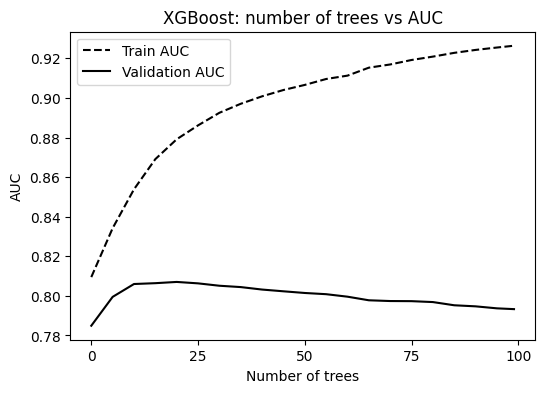

In [75]:
plt.figure(figsize=(6, 4))

plt.plot(tree_model4, aucs_train_model4, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree_model4, aucs_val_model4, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

## Tuning XGBoost parameters

#### 1. Tuning eta - 0.1,0.05,0.01

In [76]:
%%capture output

xgb_params_01 = {
    'eta': 0.1,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}


model4_V3 = xgb.train(xgb_params_01, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [77]:
tree_01, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree_01)))

0.80949
(0.80949, 80)


In [78]:
%%capture output
xgb_params_005 = {
    'eta': 0.01,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}
model4_V4 = xgb.train(xgb_params_01, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [79]:
tree_005, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree_005)))

0.80949
(0.80949, 80)


In [80]:
%%capture output

xgb_params_001 = {
    'eta': 0.01,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}
model4_V5 = xgb.train(xgb_params_001, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [81]:
tree_001, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree_001)))

0.80882
(0.80882, 499)


In [82]:
%%capture output

xgb_params_03 = {
    'eta': 0.3,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}
model4_V6 = xgb.train(xgb_params_03, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [83]:
tree_03, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree_03)))

0.80705
(0.80705, 20)


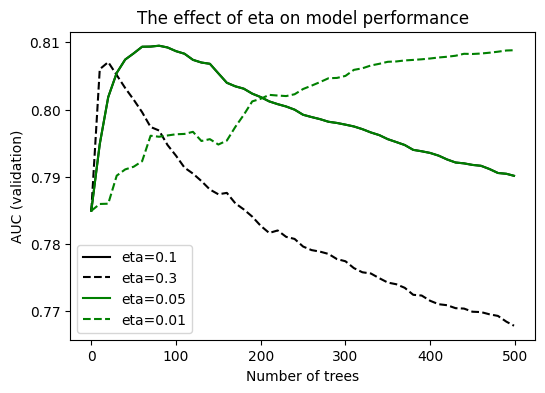

In [84]:
plt.figure(figsize=(6, 4))

plt.plot(tree_01, aucs_val_eta_01, color='black', linestyle='solid', label='eta=0.1')
plt.plot(tree_03, aucs_val_eta_03, color='black', linestyle='dashed', label='eta=0.3')
plt.plot(tree_005, aucs_val_eta_005, color='green', linestyle='solid', label='eta=0.05')
plt.plot(tree_001, aucs_val_eta_001, color='green', linestyle='dashed', label='eta=0.01')

# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

In [85]:
# eta = 0.05 has highest auc at tree num = 60 to 100 somewhere

### Tuning max depth - 8,9,10,

In [86]:
%%capture output

xgb_params_8 = {
    'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}
model_4_V7 = xgb.train(xgb_params_8, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [87]:
tree_v7, _, aucs_val_v7 = parse_xgb_output(output)
print(max(aucs_val_v7))
print(max(zip(aucs_val_v7, tree_v7)))

0.81032
(0.81032, 150)


In [88]:
%%capture output

xgb_params_9 = {
    'eta': 0.05,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model4_v8 = xgb.train(xgb_params_9, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [89]:
tree_v8, _, aucs_val_v8 = parse_xgb_output(output)
print(max(aucs_val_v8))
print(max(zip(aucs_val_v8, tree_v8)))

0.80954
(0.80954, 120)


In [90]:
%%capture output

xgb_params_10 = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model4_v9 = xgb.train(xgb_params_10, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [91]:
tree_v9, _, aucs_val_v9 = parse_xgb_output(output)
print(max(aucs_val_v9))
print(max(zip(aucs_val_v9, tree_v9)))

0.80899
(0.80899, 120)


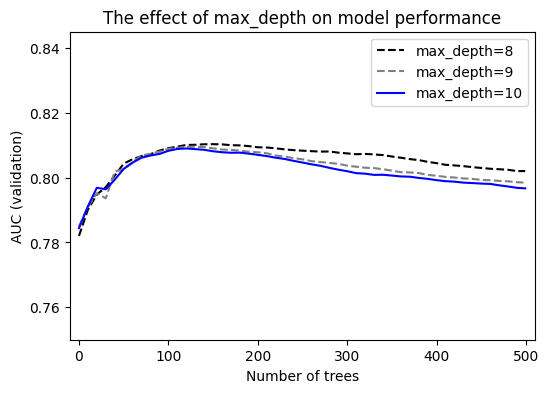

In [92]:
plt.figure(figsize=(6, 4))

plt.plot(tree_v7, aucs_val_v7, color='black', linestyle='dashed', label='max_depth=8')
plt.plot(tree_v8, aucs_val_v8, color='grey', linestyle='dashed', label='max_depth=9')
plt.plot(tree_v9, aucs_val_v9, color='blue', linestyle='solid', label='max_depth=10')


plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

In [93]:
# max_depth = 9 since there is not much difference

### Tuning min child weight

In [94]:
%%capture output

xgb_params_v10 = {
    'eta': 0.05,
    'max_depth': 9,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model_v10 = xgb.train(xgb_params_v10, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [96]:
tree_v10, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree_v10)))

0.80954
(0.80954, 120)


In [97]:
%%capture output

xgb_params_v11 = {
    'eta': 0.05,
    'max_depth': 9,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params_v11, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [100]:
tree_v11, _, aucs_val_mcw11 = parse_xgb_output(output)
print(max(aucs_val_mcw11))
print(max(zip(aucs_val_mcw11, tree_v11)))

0.81134
(0.81134, 170)


In [101]:
%%capture output

xgb_params_v12 = {
    'eta': 0.05,
    'max_depth': 9,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params_v12, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [102]:
tree_v12, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree_v12)))

0.8094
(0.8094, 220)


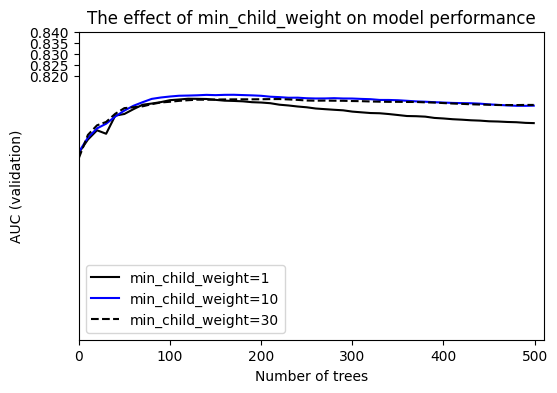

In [104]:
plt.figure(figsize=(6, 4))

plt.plot(tree_v10, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree_v11, aucs_val_mcw11, color='blue', linestyle='solid', label='min_child_weight=10')
plt.plot(tree_v12, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.7, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

In [ ]:
#min child weight =10 gives highest auc

### Tuning for best number of trees

In [105]:
%%capture output

xgb_params_v13 = {
    'eta': 0.05,
    'max_depth': 9,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model_v13 = xgb.train(xgb_params_v13, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [106]:
print(output)

[0]	train-auc:0.80838	val-auc:0.78525
[10]	train-auc:0.81619	val-auc:0.79186
[20]	train-auc:0.82344	val-auc:0.79606
[30]	train-auc:0.82725	val-auc:0.79818
[40]	train-auc:0.83349	val-auc:0.80145
[50]	train-auc:0.83777	val-auc:0.80415
[60]	train-auc:0.84272	val-auc:0.80634
[70]	train-auc:0.84605	val-auc:0.80796
[80]	train-auc:0.84889	val-auc:0.80947
[90]	train-auc:0.85095	val-auc:0.81010
[100]	train-auc:0.85236	val-auc:0.81055
[110]	train-auc:0.85412	val-auc:0.81090
[120]	train-auc:0.85552	val-auc:0.81098
[130]	train-auc:0.85704	val-auc:0.81110
[140]	train-auc:0.85865	val-auc:0.81130
[150]	train-auc:0.85962	val-auc:0.81117
[160]	train-auc:0.86064	val-auc:0.81131
[170]	train-auc:0.86176	val-auc:0.81134
[180]	train-auc:0.86255	val-auc:0.81120
[190]	train-auc:0.86329	val-auc:0.81107
[200]	train-auc:0.86390	val-auc:0.81088
[210]	train-auc:0.86470	val-auc:0.81046
[220]	train-auc:0.86534	val-auc:0.81027
[230]	train-auc:0.86595	val-auc:0.80999
[240]	train-auc:0.86640	val-auc:0.81002
[250]	train

In [107]:
tree_v13, _, aucs_val_v13 = parse_xgb_output(output)
print(max(aucs_val_v13))

0.81134


In [108]:
max(zip(aucs_val_v13, tree_v13))

(0.81134, 170)

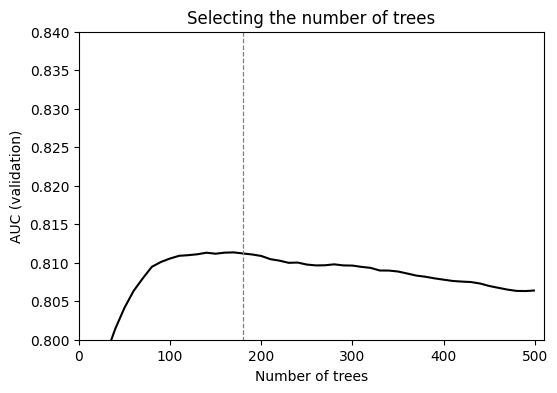

In [109]:
plt.figure(figsize=(6, 4))

plt.plot(tree_v13, aucs_val_v13, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

# best number of trees is : 170

## Feature importance analysis

#### 1. Random forest

In [110]:
Model3_RF_Final.feature_importances_

array([3.01600866e-03, 3.90673824e-04, 2.54661151e-04, 2.50952685e-04,
       4.86447503e-03, 3.63628815e-03, 6.99464182e-03, 8.79409324e-03,
       3.41530631e-03, 3.21287267e-03, 1.33793943e-04, 9.09699879e-05,
       3.23718979e-04, 2.48091028e-04, 1.03166822e-02, 1.06598850e-02,
       1.02312150e-01, 9.00149689e-02, 2.41605373e-03, 3.34932169e-03,
       5.42680421e-03, 5.97533881e-03, 2.02019634e-03, 2.71047930e-03,
       1.42758512e-04, 1.07647988e-03, 1.69687276e-03, 2.08465705e-03,
       1.26887959e-02, 2.22706088e-04, 1.94372387e-02, 6.55530814e-03,
       4.26365969e-04, 1.47892156e-03, 1.24081205e-03, 2.53134884e-03,
       3.85747353e-03, 1.14367984e-04, 9.65944664e-05, 6.95848524e-03,
       6.17887774e-03, 3.96811336e-03, 2.99904961e-03, 1.48108227e-03,
       1.52440931e-03, 1.47844929e-03, 1.41657603e-03, 2.13173644e-04,
       1.79465479e-04, 5.90263563e-04, 5.31382076e-04, 6.66200428e-02,
       3.10378445e-02, 6.87372866e-02, 5.44577155e-03, 5.12403835e-03,
      

In [111]:
imp = list(zip(dv.feature_names_,Model3_RF_Final.feature_importances_))

In [112]:
df_imp = pd.DataFrame(imp,columns=['feature', 'gain'])
df_imp = df_imp.sort_values(by='gain',ascending=False)
df_imp

,feature,gain
16,criminal_justice_status=no,0.102312
17,criminal_justice_status=yes,0.090015
80,program_category=inpatient,0.081560
53,living_situation=private_residence,0.068737
51,living_situation=institutional_setting,0.066620
...,...,...
105,"transgender=no,_not_transgender",0.000099
38,heart_attack=yes,0.000097
11,alzheimer_or_dementia=yes,0.000091
76,principal_diagnosis_class=physical_disorder,0.000037


In [113]:
df_imp = df_imp[df_imp.gain > 0.01]

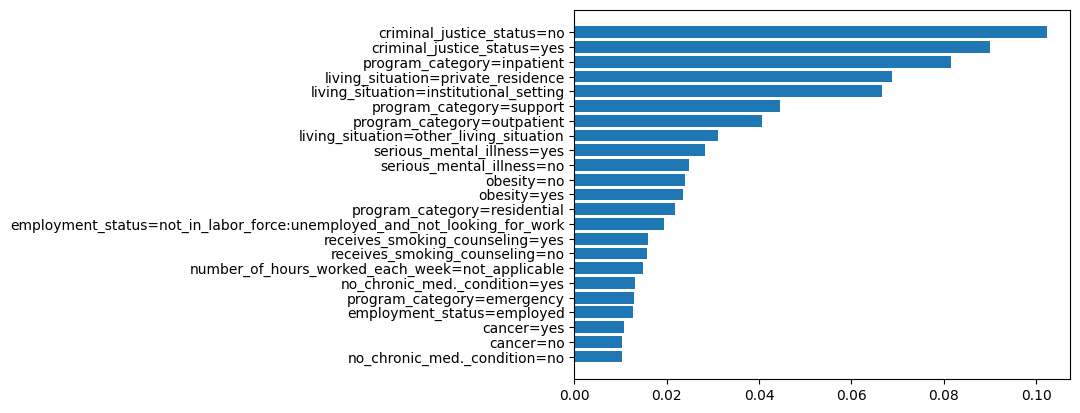

In [125]:
n = len(df_imp)
plt.barh(range(n), df_imp.gain[::-1])
plt.yticks(range(n), df_imp.feature[::-1])

plt.show()

#### 2. XG Boost

In [116]:
scorevals = model.get_score(importance_type='gain')
scorevals = sorted(scorevals.items(), key=lambda x: x[1])
list(reversed(scorevals))

[('program_category=inpatient', 35.83089828491211),
 ('employment_status=employed', 29.558513641357422),
 ('program_category=support', 25.99095344543457),
 ('living_situation=institutional_setting', 23.0455265045166),
 ('criminal_justice_status=no', 22.457134246826172),
 ('living_situation=other_living_situation', 16.58258056640625),
 ('program_category=emergency', 13.759775161743164),
 ('special_educational_services=not_applicable', 9.9210205078125),
 ('receives_smoking_counseling=no', 8.842412948608398),
 ('obesity=no', 7.824979782104492),
 ('age_group=adult', 6.705674648284912),
 ('employment_status=unemployed,_looking_for_work', 5.4582719802856445),
 ('program_category=residential', 5.260722637176514),
 ('cancer=no', 5.181883335113525),
 ('program_category=outpatient', 5.01707124710083),
 ('serious_mental_illness=no', 4.875301837921143),
 ('no_chronic_med._condition=no', 4.7093729972839355),
 ('employment_status=not_in_labor_force:unemployed_and_not_looking_for_work',
  4.408705711

In [117]:
scorevals = model.get_score(importance_type='weight')
scorevals = sorted(scorevals.items(), key=lambda x: x[1])
list(reversed(scorevals))

[('additional_diagnosis_class=unknown/deferred', 859.0),
 ('sex=female', 822.0),
 ('smokes=no', 683.0),
 ('no_chronic_med._condition=no', 680.0),
 ('educational_status=middle_school_to_high_school', 674.0),
 ('serious_mental_illness=no', 486.0),
 ('employment_status=not_in_labor_force:unemployed_and_not_looking_for_work',
  476.0),
 ('program_category=outpatient', 451.0),
 ('criminal_justice_status=no', 449.0),
 ('high_blood_pressure=no', 447.0),
 ('living_situation=other_living_situation', 414.0),
 ('living_situation=private_residence', 377.0),
 ('program_category=residential', 331.0),
 ('drug_substance_related_disorder=no', 330.0),
 ('receives_smoking_counseling=no', 326.0),
 ('obesity=no', 323.0),
 ('educational_status=college_or_graduate_degree', 290.0),
 ('program_category=support', 283.0),
 ('hyperlipidemia=no', 275.0),
 ('additional_diagnosis_class=mental_illness', 271.0),
 ('program_category=inpatient', 262.0),
 ('alcohol_related_disorder=no', 227.0),
 ('intellectual_disability

In [118]:
names = [n for (n, s) in scorevals]
scorevals = [s for (n, s) in scorevals]

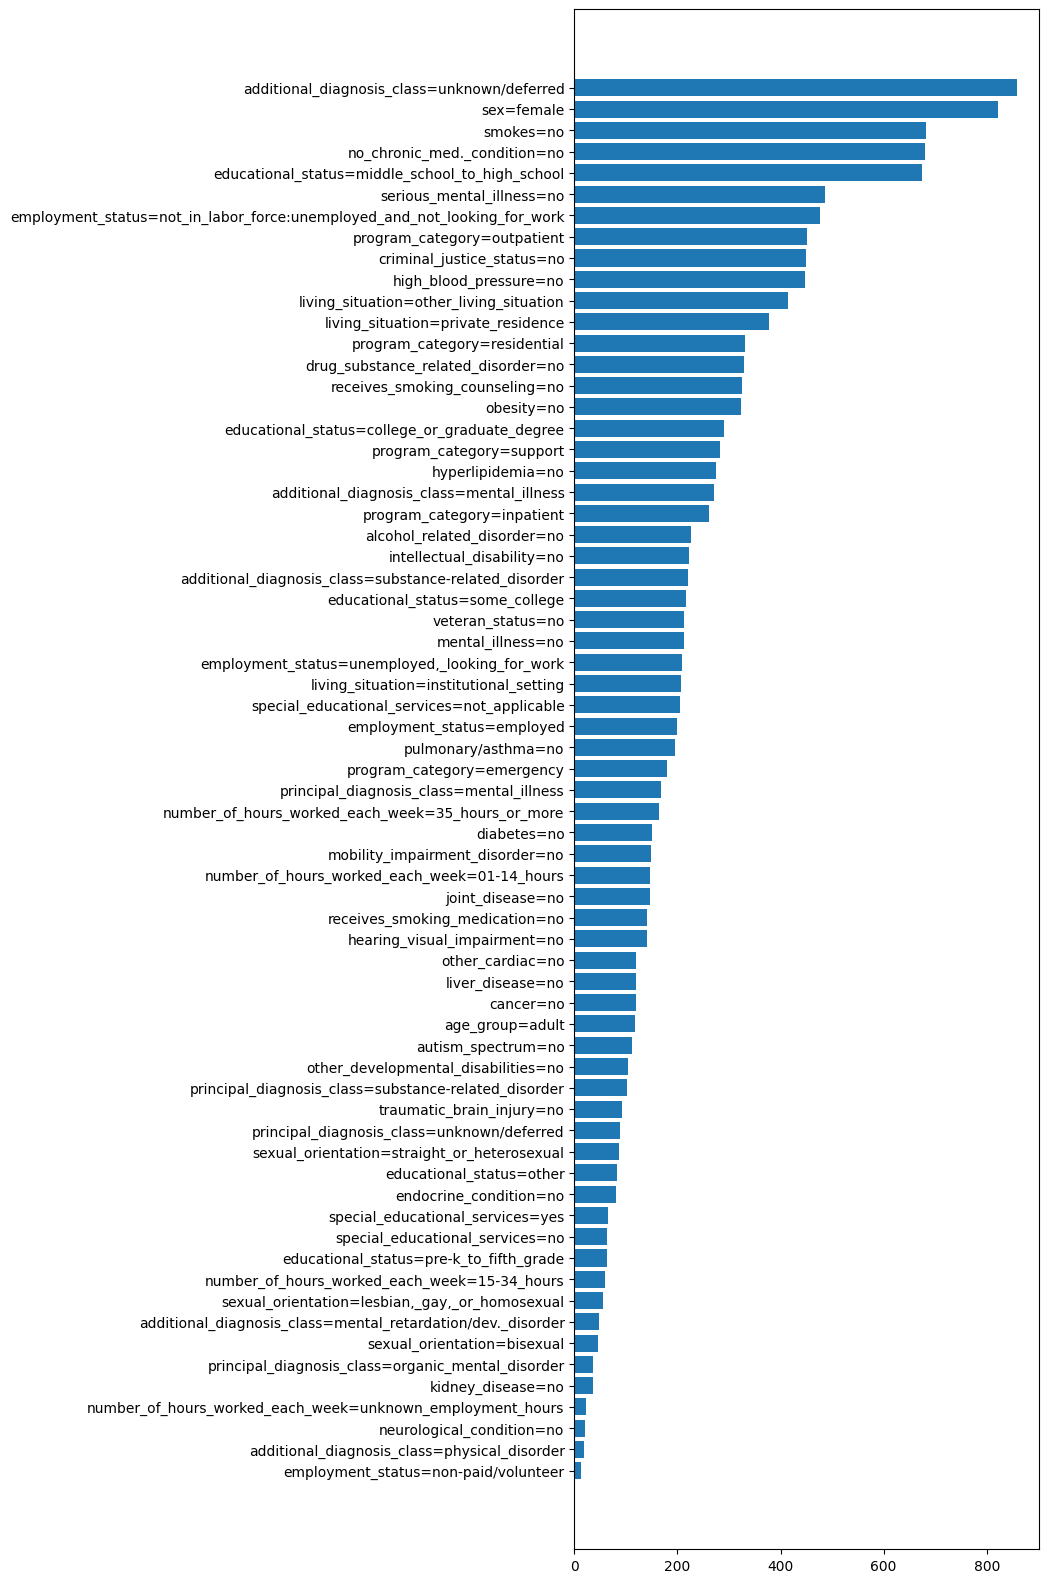

In [122]:
plt.figure(figsize=(6, 20))

plt.barh(np.arange(len(scorevals)), scorevals)
plt.yticks(np.arange(len(names)), names)

plt.show()

NameError: name 'df' is not defined